In [71]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [72]:
df = pd.read_csv("china_gdp.csv")
df.head(5)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [73]:
x = df[["Year"]]
y = df[["Value"]]

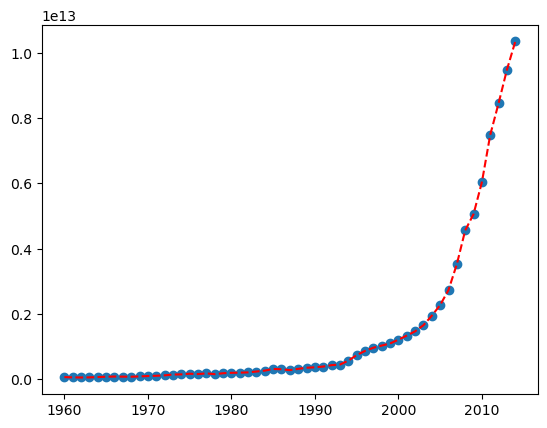

In [74]:
plt.scatter(x, y)
plt.plot(x, y, "--r");

In [75]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [76]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [77]:
y_pred = model.predict(x_test)

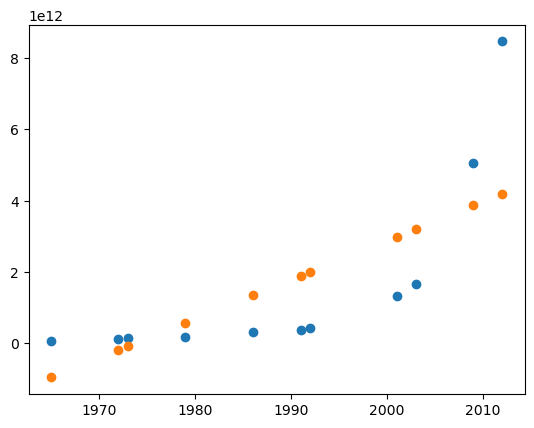

In [78]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)

In [79]:
print(f"R2: {r2_score(y_test, y_pred)}\nMSE: {mean_squared_error(y_test, y_pred)}")

R2: 0.557799840215933
MSE: 2.9097229920495426e+24


# BAD MODEL BECOUSE R2 = 0.55 
# R2 > 0.8 IS GOOD MODEL

In [80]:
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

In [81]:
model = LinearRegression()
model.fit(x_poly_train, y_train)

LinearRegression()

In [82]:
print(model.coef_, model.intercept_)

[[ 0.00000000e+00 -2.39999930e+13  6.06813165e+09]] [2.37298728e+16]


In [83]:
y_pred = model.predict(x_poly_test)

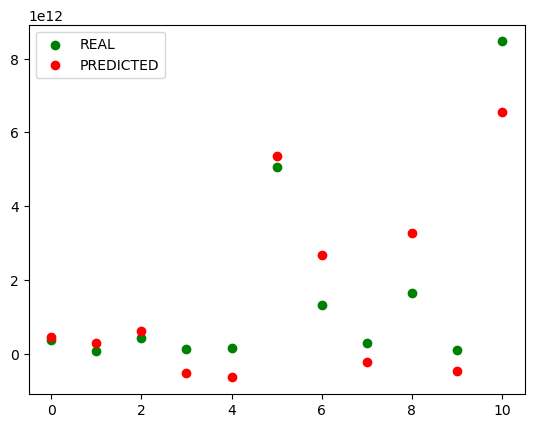

In [84]:
plt.scatter(range(len(y_test)), y_test, color="green", label="REAL")
plt.scatter(range(len(y_test)), y_pred, color="red", label="PREDICTED")
plt.legend();

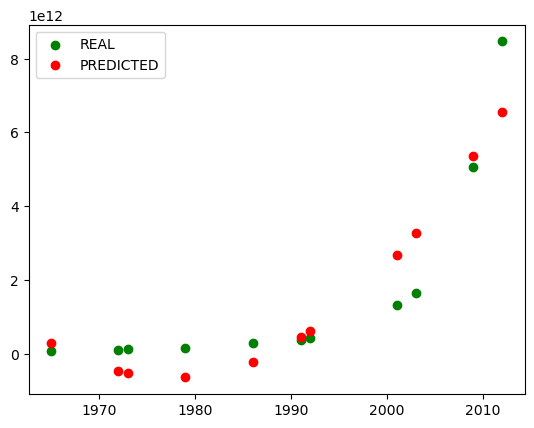

In [85]:
plt.scatter(x_test, y_test, color="green", label="REAL")
plt.scatter(x_test, y_pred, color="red", label="PREDICTED")
plt.legend();

In [86]:
print(f"R2: {r2_score(y_test, y_pred)},\nMSE: {mean_squared_error(y_test, y_pred)}")

R2: 0.8615852270181502,
MSE: 9.107835862865231e+23


# THIS IS GOOD MODEL BECOUSE R2 > 0.8